# Machine Learning HW_1 
## SVM Classifier

You	are	given	two	data files	named ‘data1.txt’	and	‘data2.txt’.	These data	files contain three	columns:	the	first	column	is	label,	and	the	second	and	third	columns represent values	in x	and	y respectively.	Download	these	files	into	your	local directory. Read	the	file	and	complete	following	tasks.

>>
1. Visualize the	data in	the	x-y	coordinate: Draw	the	distribution	of	data	in	x-y	coordinate	with	different	shape	and	colors. Use	import	matplotlib.pyplot	as	plt and	plt.scatter	function. Use	plt.xlim and	plt.ylim functions.
Add	a	legend.
2. Train your	classifier	using	Support	Vector	Machine	(SVM)	with	Radial Basis	Function (RBF) and	visualize it: Use	gamma	values	including	0.1,	1,	10,	100,	1000 differently	for	your	training. For	each	gamma	value,	draw	decision	regions	using def	plot_decision_regions(X,	y,	classifier,	test_idx=None,	resolution=0.02) function	given	in	the	class.	Use	a	loop	to	show	5	different	drawings	according	to 5	gamma	values.
3. Divide	data	into	the	first	90%	of	data as	training	dataset and	the	last	10%	of	data	as	test	dataset	in	the	code. Train	your	classifier	with	the	training	data	and	shows	decision	regions	for	the	test	data	indicated	by	the	circle	shape	as well	as	for	the	training	data	in	the	plot	of decision	regions.	If	you	are	able	to	print	out	the	accuracy	for	the	test	data according	to	5	different	gamma	values	when	you	trained	your	classifiers,	you	will	get additional 20 points	of	bonus.


In [6]:
# load pandas and numpy libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import missingno as msno
import seaborn as sns
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

from mlxtend.plotting import plot_decision_regions

In [7]:
# load the entire dataset from a file uploaded to my GitHub repo
df1 = pd.read_csv("https://raw.githubusercontent.com/MatthewFried/ML_and_PredictiveModeling/main/data_1.csv")
df2 = pd.read_csv("https://raw.githubusercontent.com/MatthewFried/ML_and_PredictiveModeling/main/data_2.csv")


In [8]:
#create datasets to test for +1 and -1 
df1_pos = df1.query("Output==1")
df1_neg = df1.query("Output==-1")


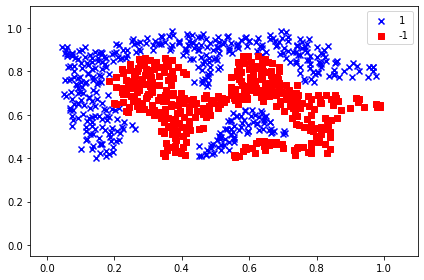

In [9]:
plt.scatter(df1_pos['X'],df1_pos['Y'], c='b', marker='x', label='1')
plt.scatter(df1_neg['X'],df1_neg['Y'], c='r', marker='s', label='-1')
plt.xlim([-.05, 1.1])
plt.ylim([-.05, 1.1])
plt.legend(loc='best')
plt.tight_layout()
plt.show()

Increasing gamma makes the bell-shape curve narrower, and as a result each instance’s range of influence is smaller: the decision boundary ends up being more irregular, wiggling around individual instances. Conversely, a small gamma value makes the bell-shaped curve wider, so instances have a larger range of influence, and the decision boundary ends up smoother. So γ acts like a regularization hyperparameter: if the model is overfitting, you should reduce it, and if it is underfitting, you should increase it (similar to the C hyperparameter).

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


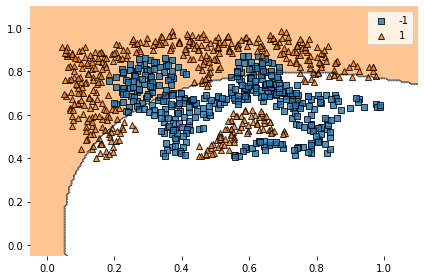

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


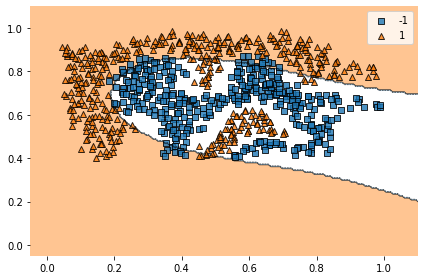

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


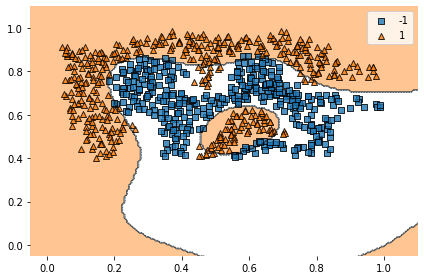

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


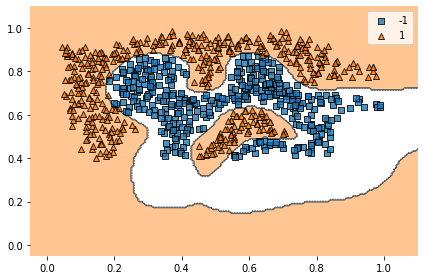

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


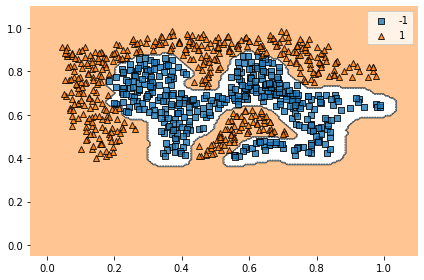

In [10]:
X = df1[['X', 'Y']].values
Y = df1['Output'].values

def picture(X, Y, param):
  svm = SVC(kernel='rbf', random_state=1, gamma=param, C=10.0)
  svm.fit(X, Y)
  plot_decision_regions(X, Y, clf=svm)
  plt.xlim([-.05, 1.1])
  plt.ylim([-.05, 1.1])
  plt.legend(loc='best')
  plt.tight_layout()
  plt.show()

parameters = [0.1,	1,	10,	100,	1000]
for k in parameters:
  picture(X,Y,k)

Below I train the data using train_test_split with the test size as 10%.  I output the accuracy, recall, auc, f1, and precision.  I use a cross-validation of 5 when doing this. I also output the chart for the predicted values for the training and test data.  

For gamma of  0.1
Accuracy		Recall		AUC			F1			Precision
[0.7078601794992915, 0.7350860110353781, 0.7565328535169391, 0.7293540137817459, 0.724871097127319]






/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


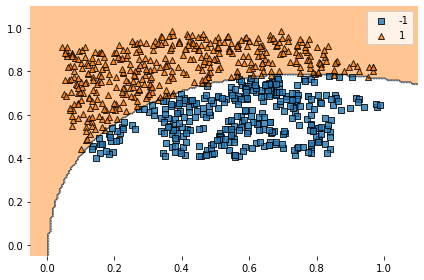

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


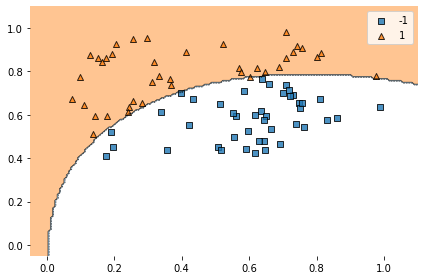





For gamma of  1
Accuracy		Recall		AUC			F1			Precision
[0.8203212092583845, 0.7656929568321973, 0.8506108697021222, 0.8196503275863322, 0.8862215808512275]






/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


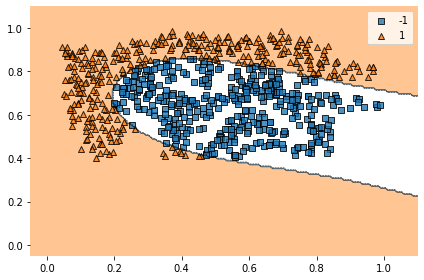

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


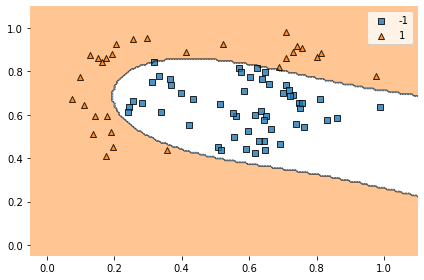





For gamma of  10
Accuracy		Recall		AUC			F1			Precision
[0.9300803023145962, 0.9287244401168451, 0.9794131823840875, 0.934627427165478, 0.9420410202721996]






/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


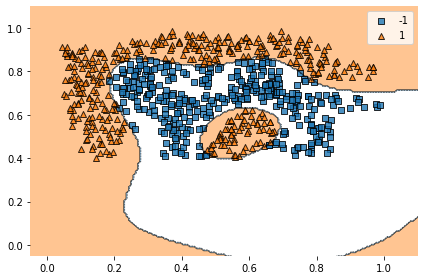

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


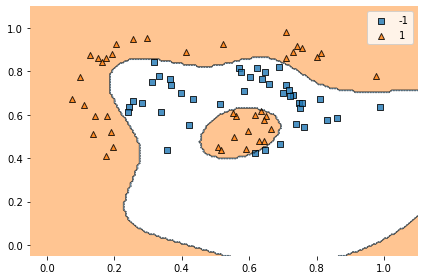





For gamma of  100
Accuracy		Recall		AUC			F1			Precision
[0.9863013698630138, 0.9924050632911392, 0.9995467276709984, 0.9873867293972527, 0.9828227590618928]






/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


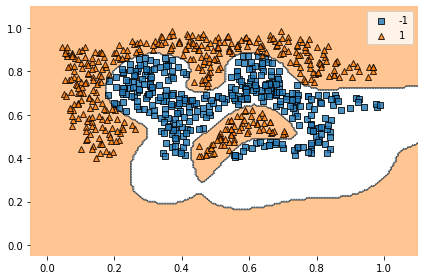

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


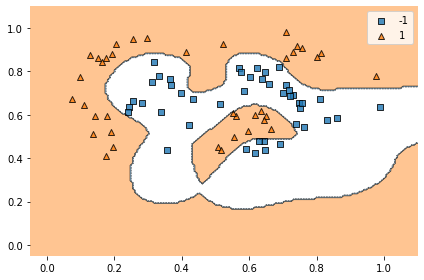





For gamma of  1000
Accuracy		Recall		AUC			F1			Precision
[0.9931506849315068, 0.9949367088607595, 0.9998867210998105, 0.9936303665159588, 0.9924683544303796]






/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


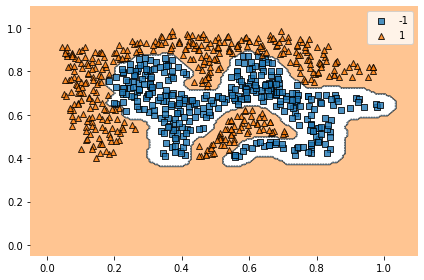

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


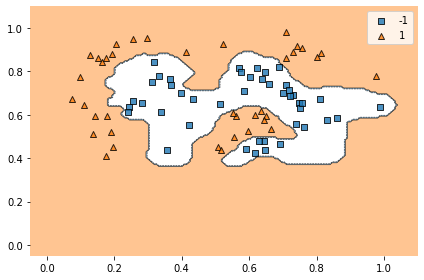

In [12]:
def train_test(X, Y, parameters):

  X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.1, random_state=1)
  svm = SVC(kernel = 'rbf', C=10, gamma=parameters)
  svm.fit(X_train, y_train)

  accuracy = cross_val_score(svm, X_train, y_train, scoring = "accuracy", cv = 5)
  recall = cross_val_score(svm, X_train, y_train, scoring = "recall", cv = 5)
  auc = cross_val_score(svm, X_train, y_train, scoring = "roc_auc", cv = 5)
  f1 = cross_val_score(svm, X_train, y_train, scoring = "f1", cv = 5)
  precision = cross_val_score(svm, X_train, y_train, scoring = "precision", cv = 5)

  the_list = []
  the_list.append(accuracy.mean())
  the_list.append(recall.mean())
  the_list.append(auc.mean())
  the_list.append(f1.mean())
  the_list.append(precision.mean())
  print("For gamma of ", parameters)
  print("Accuracy\t\tRecall\t\tAUC\t\t\tF1\t\t\tPrecision")
  print(the_list)
  print("\n")


  train_predictedvalues = svm.predict(X_train)
  test_predictedvalues = svm.predict(X_test)

  plot_decision_regions(X_train, train_predictedvalues,clf=svm)
  plt.xlim([-.05, 1.1])
  plt.ylim([-.05, 1.1])
  plt.legend(loc='best')
  plt.tight_layout()
  plt.show()

  plot_decision_regions(X_test, test_predictedvalues, clf=svm)
  plt.xlim([-.05, 1.1])
  plt.ylim([-.05, 1.1])
  plt.legend(loc='best')
  plt.tight_layout()
  plt.show()
  print("\n\n\n")

parameters = [0.1,	1,	10,	100,	1000]
X = values
Y = output
for k in parameters:
  train_test(X, Y, k)

# Testing the Second Data Set


In [15]:
#create datasets to test for +1 and -1 
df2_pos = df2.query("Output==1")
df2_neg = df2.query("Output==-1")

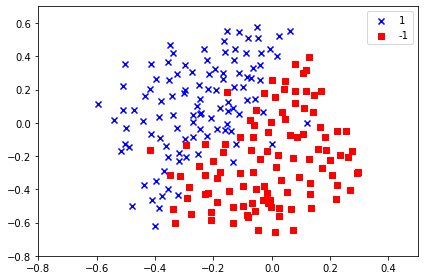

In [18]:
plt.scatter(df2_pos['X'],df2_pos['Y'], c='b', marker='x', label='1')
plt.scatter(df2_neg['X'],df2_neg['Y'], c='r', marker='s', label='-1')
plt.xlim([-.8, .5])
plt.ylim([-.8, .7])
plt.legend(loc='best')
plt.tight_layout()
plt.show()

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


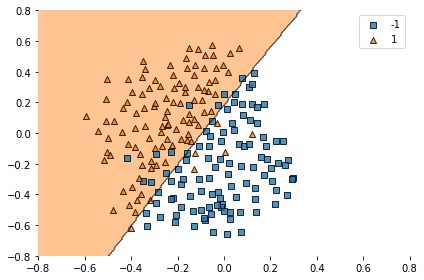

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


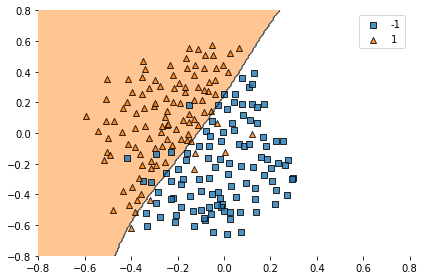

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


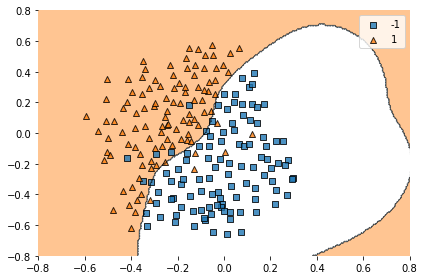

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


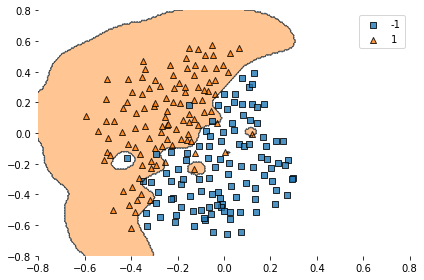

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


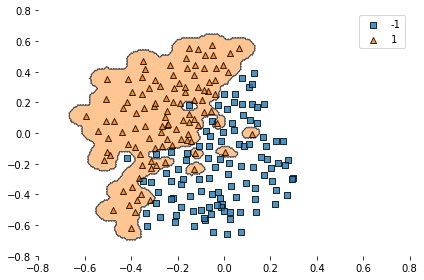

In [20]:
X = df2[['X', 'Y']].values
Y = df2['Output'].values

def picture2(X, Y, param):
  svm = SVC(kernel='rbf', random_state=1, gamma=param, C=10.0)
  svm.fit(X, Y)
  plot_decision_regions(X, Y, clf=svm)
  plt.xlim([-.8, .8])
  plt.ylim([-.8, .8])
  plt.legend(loc='best')
  plt.tight_layout()
  plt.show()

parameters = [0.1,	1,	10,	100,	1000]
for k in parameters:
  picture2(X,Y,k)

For gamma of  0.1
Accuracy		Recall		AUC			F1			Precision
[0.7078601794992915, 0.7350860110353781, 0.7565328535169391, 0.7293540137817459, 0.724871097127319]




/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


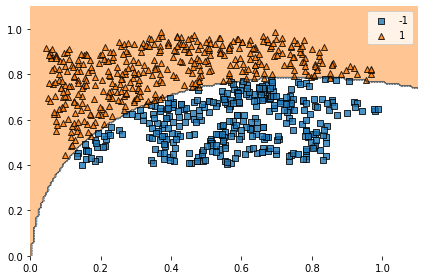

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


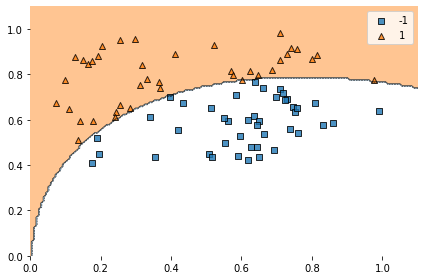





For gamma of  1
Accuracy		Recall		AUC			F1			Precision
[0.8203212092583845, 0.7656929568321973, 0.8506108697021222, 0.8196503275863322, 0.8862215808512275]




/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


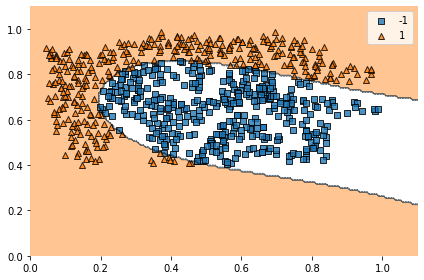

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


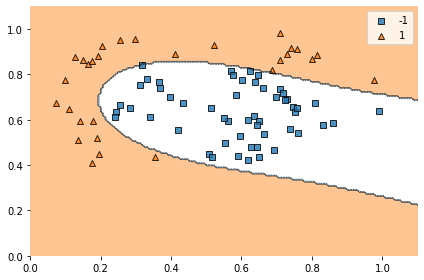





For gamma of  10
Accuracy		Recall		AUC			F1			Precision
[0.9300803023145962, 0.9287244401168451, 0.9794131823840875, 0.934627427165478, 0.9420410202721996]




/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


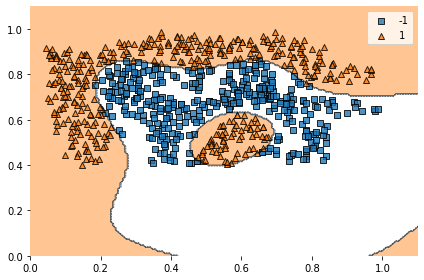

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


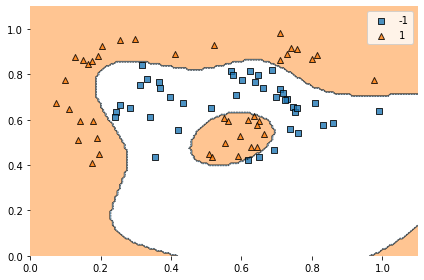





For gamma of  100
Accuracy		Recall		AUC			F1			Precision
[0.9863013698630138, 0.9924050632911392, 0.9995467276709984, 0.9873867293972527, 0.9828227590618928]




/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


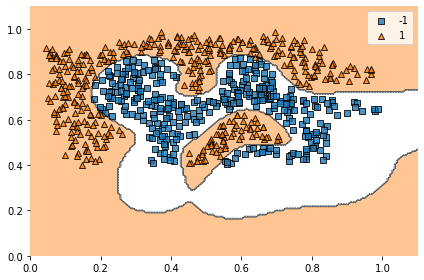

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


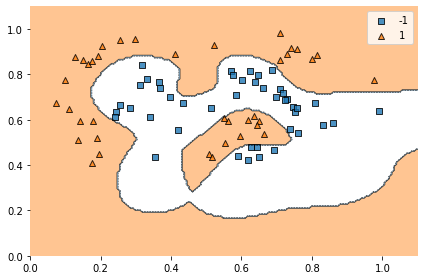





For gamma of  1000
Accuracy		Recall		AUC			F1			Precision
[0.9931506849315068, 0.9949367088607595, 0.9998867210998105, 0.9936303665159588, 0.9924683544303796]




/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


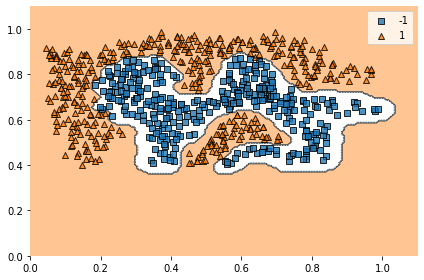

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


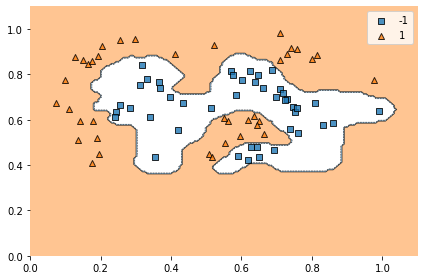

In [23]:
def train_test2(X, Y, parameters):

  X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.1, random_state=1)
  svm = SVC(kernel = 'rbf', C=10, gamma=parameters)
  svm.fit(X_train, y_train)

  accuracy = cross_val_score(svm, X_train, y_train, scoring = "accuracy", cv = 5)
  recall = cross_val_score(svm, X_train, y_train, scoring = "recall", cv = 5)
  auc = cross_val_score(svm, X_train, y_train, scoring = "roc_auc", cv = 5)
  f1 = cross_val_score(svm, X_train, y_train, scoring = "f1", cv = 5)
  precision = cross_val_score(svm, X_train, y_train, scoring = "precision", cv = 5)

  the_list = []
  the_list.append(accuracy.mean())
  the_list.append(recall.mean())
  the_list.append(auc.mean())
  the_list.append(f1.mean())
  the_list.append(precision.mean())
  print("For gamma of ", parameters)
  print("Accuracy\t\tRecall\t\tAUC\t\t\tF1\t\t\tPrecision")
  print(the_list)
  print("\n")

  train_predictedvalues = svm.predict(X_train)
  test_predictedvalues = svm.predict(X_test)

  plot_decision_regions(X_train, train_predictedvalues,clf=svm)
  plt.xlim([0, 1.1])
  plt.ylim([0, 1.1])
  plt.legend(loc='best')
  plt.tight_layout()
  plt.show()

  plot_decision_regions(X_test, test_predictedvalues, clf=svm)
  plt.xlim([0, 1.1])
  plt.ylim([0, 1.1])
  plt.legend(loc='best')
  plt.tight_layout()
  plt.show()
  print("\n\n\n")

parameters = [0.1,	1,	10,	100,	1000]
X = values
Y = output
for k in parameters:
  train_test2(X, Y, k)